# 과제 1 - k-Nearest Neighbor Classifier

## 과제 개요

본 과제에서는 k-NN classification 알고리즘이 동작하도록 Python 코드를 작성하고, 
다양한 k 값에 대한 classification 결과를 측정하여 주어진 데이터에 대한 최적의 hyper-parameter를 도출하는 실험을 수행합니다.

여러분이 작성할 코드는 크게 아래의 부분으로 나뉩니다:
1. 본 hw1_main.ipynb 파일, run_knn.py 파일, utils.py 파일, plot_digits.py 파일, l2_distance.py 파일을 열어서 한줄한줄 읽어서 코드의 의미를 파악함
2. run_knn.py 파일, 함수 run_knn() 내의 TODO 부분의 코드를 추가하여 함수 구현을 완성함
3. 본 hw1_main.ipynb 파일 내 아래 셀들의 코드를 완성하여 실험 대상이 될 MNIST DB를 파일로부터 읽어오고, 다양한 k값을 인자로 하여 run_knn 함수를 수행시키고 도출되는 결과를 비교하여 최적의 k 값을 도출함

위 사항들 중 3번 사항과 관련된 세부 내용은 본 파일의 아래 각 셀마다 달린 markup 설명 문구를 참고하여 작성하세요.
과제 결과물은 코드를 작성한 run_knn.py 및 hw1_main.ipynb, 2개 파일을 파일명 그대로 ecampus 사이트에 업로드하면 됩니다.
(마지막 가산점수 문제까지 수행할 경우에는 l2_distance.py 파일까지 업로드하시면 됩니다.)

### 셀1: Data loading

Classification의 대상이 되는 data는 필기체 숫자 인식에 대한 MNIST DB 중 숫자 2와 8에 대한 28x28 pixel array 필기체 영상입니다. 각 class 별로 100 examples를 포함하는 mnist_train.npz과, class 별로 5 examples를 포함하는 mnist_train_small.npz 등 두 종류의 training set이 제공되며, 검증을 위해 class 별로 25 examples를 포함하는 validation set인 mnist_valid.npz와, test set인 mnist_test.npz가 같이 제공됩니다. mnist valid는 hyperparameter 등 최적 모델을 선택할 때 사용하면 됩니다.

utils.py 파일에는 dataset를 로딩하기 위한 함수들이 제공됩니다. 
아래 셀에서는 utils.py의 함수를 이용하여 필요에 따라 mnist_train.npz, mnist_train_small.npz, mnist_valid.npz, mnist_test.npz 등의 파일을 불러오십시오.

In [53]:
# CELL 1: load MNIST data files using functions implemented in file utils.
import utils
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# 데이터를 로드합니다.
# train dataset
train_img, train_label = utils.load_train()
train_img_s, train_label_s = utils.load_train_small()

# validation dataset
val_img, val_label  = utils.load_valid()

# test dataset
test_img, test_label = utils.load_test()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 셀2: Data visualization

plot_digits.py 파일에는 dataset을 시각화 visualize하기 위한 코드가 제공되어 있으니 코드를 읽고 활용하여 눈으로 데이터를 확인해 봅시기 바랍니다.

Displaying pane 1/1


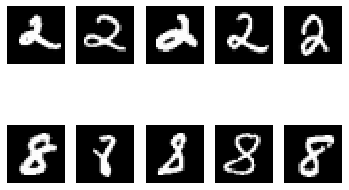

In [54]:
# CELL 2: visualize loaded MNIST data files using functions implemented in file plot_digits.py
from plot_digits import plot_digits
%matplotlib inline

#show images
plot_digits(train_img_s)

### 셀3: Run NN classifier with k = 1

run_knn.py 파일에는 k-NN classifier의 대부분이 구현되어 있습니다. 여러분은 벡터들 간의 거리를 계산하는 부분과, 계산된 거리를 정렬sorting시켜서 최소 거리를 갖는 데이터의 인덱스들을 도출하는 부분의 코드만 추가하여 함수를 완성하면 됩니다. 벡터들 간의 거리를 계산하는 부분은 제공해드린 파일들 중 l2_distance.py 내의 함수를 활용하시면 되고, 계산된 거리를 정렬하는 부분에서는 Numpy 라이브러리에서 적절한 함수를 검색하여 활용하면 됩니다.

그렇게 함수 구현을 완성한 후, 아래 셀에서 로딩된 mnist_train_small 및 mnist_validation 데이터 변수들을 인자로 run_knn() 함수를 호출하여 반환 결과 값을 변수로 저장하세요. 이때 k = 1으로 설정하세요. 

도출된 결과가 정확한지를 확인하기 위해, 로딩된 데이터의 ground truth label 값들과 비교하여 예측 정확도를 계산하고 출력시키도록 하세요. 본 문제는 multi-class classification 문제인 관계로, binary classification과 관련되는 precision/recall 계산은 적용하기 어려우니, 여기에서는 단순하게 개별 케이스 당 예측 결과가 ground truth와 같은지에 대한 비율만 제시하세요.

In [55]:
# CELL 3: complete run_knn() function in file run_knn.py, and call that function with training and validation datasets
from run_knn import run_knn

#knn 시행
predict,_ = run_knn(1,train_img_s.T,train_label_s,val_img.T,distance = 'l2')

#ground truth 와 같은지 비교
accuracy = (predict == val_label).astype(np.float32)
accuracy = accuracy.sum()/accuracy.shape[0] * 100

print(f"정확도는 {accuracy}% 입니다")

정확도는 80.0% 입니다


### 셀4: Tuning Hyperparameter k 

위 셀3에서 수행한 과정을 동일하게 수행하되, 이번에는 다양한 k 값(k = {1,2,3,4,5,6,7,8,9,10})에 대한 validation set에 대한 예측 정확도를 측정하고, 이를 바탕으로 최적의 k 값을 제시하세요.
Validation set으로 설정된 최적 k 값을 이용하여 test dataset에 대한 예측 정확도를 계산하고 출력시키세요.

In [56]:
# CELL 4: Hyperparameter tuning for k

#knn 10번 시행하고 비율 저장
acc_list = []
for k in range(10):
    predict,_ = run_knn(k+1, train_img_s.T, train_label_s, val_img.T,distance = 'l2')
    accuracy = (predict == val_label).astype(np.float32)
    accuracy = accuracy.sum()/accuracy.shape[0] * 100

    acc_list.append(accuracy)
    
#최적의 k도출 (인덱스 + 1 = k 임을 주의)
optimal_k = np.array(acc_list).argmax()+1
print(f"최적의 k는 {optimal_k} 입니다")

#테스트 셋 예측
predict = run_knn(optimal_k,train_img_s.T,train_label_s,test_img.T,distance = 'l2')
accuracy = (predict == test_label).astype(np.float32)
accuracy = accuracy.sum()/accuracy.shape[0] * 100

print(f"정확도는 {accuracy}% 입니다")

최적의 k는 1 입니다


/var/folders/k5/mdqvz0d17yg6tk40xj22_cq80000gn/T/ipykernel_50485/2472949889.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  accuracy = (predict == test_label).astype(np.float32)
/var/folders/k5/mdqvz0d17yg6tk40xj22_cq80000gn/T/ipykernel_50485/2472949889.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = (predict == test_label).astype(np.float32)


AttributeError: 'bool' object has no attribute 'astype'

### 셀5: Repeat process with mnist_train and compare

학습 dataset을 mnist_train_small에서 mnist_train으로 바꿔서 셀4의 과정을 다시 반복하여 test dataset에 대한 예측 정확도를 도출하고, 학습 dataset을 mnist_train_small으로 할 경우와 mnist_train으로 할 때의 성능 차이를 확인하세요.

In [57]:
# CELL 5: Compare between mnist_train and mnist_train_small

#knn 10번 시행하고 비율 저장
acc_list = []
for k in range(10):
    predict,_ = run_knn(k+1, train_img.T, train_label, val_img.T,distance = 'l2')
    accuracy = (predict == val_label).astype(np.float32)
    accuracy = accuracy.sum()/accuracy.shape[0] * 100

    acc_list.append(accuracy)
    
#최적의 k도출 (인덱스 + 1 = k 임을 주의)
optimal_k = np.array(acc_list).argmax()+1
print(f"최적의 k는 {optimal_k} 입니다")

#테스트 셋 예측
predict = run_knn(optimal_k,train_img.T,train_label,test_img.T,distance = 'l2')
accuracy = (predict == test_label).astype(np.float32)
accuracy = accuracy.sum()/accuracy.shape[0] * 100

print(f"정확도는 {accuracy}% 입니다")

최적의 k는 2 입니다


/var/folders/k5/mdqvz0d17yg6tk40xj22_cq80000gn/T/ipykernel_50485/914437237.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  accuracy = (predict == test_label).astype(np.float32)
/var/folders/k5/mdqvz0d17yg6tk40xj22_cq80000gn/T/ipykernel_50485/914437237.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = (predict == test_label).astype(np.float32)


AttributeError: 'bool' object has no attribute 'astype'

### 셀6: training dataset 차이에 대한 성능 차이 원인 고찰

학습 dataset을 mnist_train_small으로 할 경우와 mnist_train으로 할 때의 성능 차이에 대한 원인 분석을 본 셀의 아래에 간단하게 제시해 주세요.

성능 차이 원인 분석 제시:  
  
두 개의 데이터 셋에서 가장 차이가 나는 부분은 가지고 있는 데이터의 양입니다.  
데이터 하나하나는 정보를 담고 있고, 많은 데이터를 가질수록 더 많은 정보를 포함할 확률이 높아집니다.  
mnist_train(큰 것)으로 knn 한다는 것은 더 많은 정보로 분석한다는 의미를 가질 수도 있습니다.  
그러므로 mnist_train_small보다 mnist_train로 분석하는 것이 더 높은 정확도를 가지는것 같습니다.


In [58]:
print(train_label.shape[0])
print(train_label_s.shape[0])

200
10


### 셀7: (가산점수) L1 distance metric 코드 추가

l2_distance.py 파일 안에 기존의 l2_distance() 함수를 참고하여 l1_distance() 함수를 직접 구현하고, 
run_knn 함수에 distance metric을 무엇으로 적용할지를 설정하는 인자를 추가하고 이에 대한 조건문을 통해 호출되는 함수가 바뀌도록 수정하고,
이를 이용하여 위와 같이 mnist_train 데이터에 대해 k-NN classifier의 최대 정확도를 도출하고, 
이렇게 도출된 결과를 l2_distance()를 적용할 경우와 비교해 보세요.

In [59]:
# CELL 7: Compare between L1 and L2 distances

#knn 10번 시행하고 비율 저장
acc_list = []
for k in range(10):
    predict,_ = run_knn(k+1, train_img.T, train_label, val_img.T,distance = 'l1')
    accuracy = (predict == val_label).astype(np.float32)
    accuracy = accuracy.sum()/accuracy.shape[0] * 100

    acc_list.append(accuracy)
    
#최적의 k도출 (인덱스 + 1 = k 임을 주의)
optimal_k = np.array(acc_list).argmax()+1
print(f"최적의 k는 {optimal_k} 입니다")

#테스트 셋 예측
predict = run_knn(optimal_k,train_img.T,train_label,test_img.T,distance = 'l1')
accuracy = (predict == test_label).astype(np.float32)
accuracy = accuracy.sum()/accuracy.shape[0] * 100

print(f"정확도는 {accuracy}% 입니다")

최적의 k는 2 입니다


/var/folders/k5/mdqvz0d17yg6tk40xj22_cq80000gn/T/ipykernel_50485/2884065469.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  accuracy = (predict == test_label).astype(np.float32)
/var/folders/k5/mdqvz0d17yg6tk40xj22_cq80000gn/T/ipykernel_50485/2884065469.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = (predict == test_label).astype(np.float32)


AttributeError: 'bool' object has no attribute 'astype'

[[ 15]
 [ 79]
 [  3]
 [176]
 [ 64]
 [ 28]]
Displaying pane 1/1


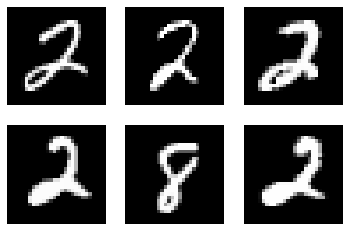

In [68]:
num = 10
img = test_img[num]
label = test_label[num][0]
k = 6

_, array= run_knn(k, train_img.T, train_label, img.reshape(-1,1),distance = 'l2')
print(array)

ans = []
ans.append(test_img[num].reshape(-1,1))
for i in range(k):
    ans.append(train_img[array[i].reshape(-1)].reshape(-1,1))
ans = np.array(ans)

plot_digits(ans)

None
